In [2]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

# 30m

In [3]:
d_30 = [-37, -27, -17, -7, 2]
df_30 = pd.DataFrame(columns=["Tx Gain -37dBm", "Tx Gain -27dBm", "Tx Gain -17dBm", "Tx Gain -7dBm", "Tx Gain 2dBm"], index=["Round_1", "Round_2", "Round_3"])

df_30.iloc[:, 0] = [round(i, 6) for i in [0.002084051724137931, 0.0010237068965517242, 0.0017844827586206897]]
df_30.iloc[:, 1] = [round(i, 6) for i in [8.836206896551724e-05, 6.944444444444445e-06, 6.944444444444445e-06]]
df_30.iloc[:, 2] = [round(i, 6) for i in [2.8017241379310345e-05, 6.944444444444445e-06, 6.944444444444445e-06]]
df_30.iloc[:, 3] = [round(i, 6) for i in [6.944444444444445e-06, 6.944444444444445e-06, 6.944444444444445e-06]]
df_30.iloc[:, 4] = [round(i, 6) for i in [0.0012349137931034482, 0.00021551724137931034, 2.1551724137931035e-06]]

# df_30 = df_30.append(df_30.mean(),ignore_index=True)

# 60m

In [4]:
d_60 = [-27, -17, 2]
df_60 = pd.DataFrame(columns=["Tx Gain -27dBm", "Tx Gain -17dBm", "Tx Gain -2dBm"], index=["Round_1", "Round_2", "Round_3"])

df_60.iloc[0, 0] = round(0.027333161777320297, 6)
df_60.iloc[:, 1] = [round(i, 6) for i in [0.0015495689655172413, 0.007146551724137931, 0.0032155172413793104]]
df_60.iloc[:, 2] = [round(i, 6) for i in [6.46551724137931e-06, 0.00020474137931034484, 0.00036206896551724136]]

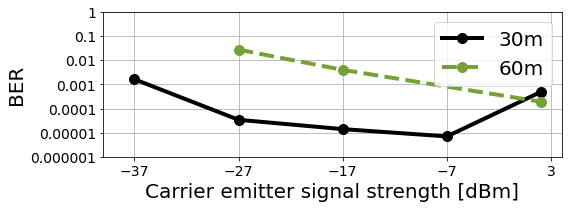

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

ax1.plot(d_30, df_30.mean(), color='black', marker='o', markersize=10, linewidth=4, label='30m')
ax1.plot(d_60, df_60.mean(), color='#77A136', marker='o', markersize=10, linewidth=4, linestyle='--', label='60m')
ax1.set_xlabel('Carrier emitter signal strength [dBm]', fontsize=20)
ax1.set_ylabel('BER', fontsize=20)
ax1.tick_params(labelsize=14)

ax1.set_yscale('log')
tmp = [-6, -5, -4, -3, -2, -1, 0]
tmp = [10**i for i in tmp]
ax1.set_yticks(tmp)
tmp = ['{:f}'.format(i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)

ax1.set_xticks(range(-37,12,10))
ax1.set_xlim([-40,4])
ax1.grid()

plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('./mono_indoor.pdf')